<a href="https://colab.research.google.com/github/anu-tressy/Projects/blob/main/portfolioproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCTION**

In this notebook, we will explore the data from the bangalore housing-price-prediction, which is about predicting the house prices.

Our goal is to create a model that can estimate the house prices for the given data.

We will be using pandas,numpy, matplotlib, seaborn and Linear Regression.

# **LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import autoviz
import re

# **ACCESS THE DATA AND HAVE A SWIFT OVERVIEW**

In [2]:
df = pd.read_csv('bengaluru_house_prices.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


 Concise summary of the DataFrame's structure

In [3]:
df.info

<bound method DataFrame.info of                   area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.

 Count the number of missing (NaN or None) values in each column of the dataframe.

In [4]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

Display the data types of each column in the DataFrame.

In [5]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

Overview of the DataFrame's size.

In [6]:
df.shape

(13320, 9)

Count the occurrences of unique values in the 'area_type' column

In [7]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

 Count the occurrences of unique values in the 'location' column

In [8]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

# **DATA CLEANING**

Creating a new DataFrame 'df1' by removing the 'availability' and 'society' columns from the original DataFrame 'df'.

In [9]:
df1=df.drop(['availability','society'],axis=1)
df1

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


Count the number of missing (NaN or None) values in each column of the dataframe(df1).



In [10]:
df1.isna().sum()


area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

Filling the missing values in the 'balcony' and 'bath' columns of DataFrame 'df1'.

In [11]:
df1['balcony'].fillna(0, inplace=True)
df1['bath'].fillna(0, inplace=True)

Eliminating rows with incomplete data.

In [12]:
df2=df1.dropna()
df2

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,0.0,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


Converting inconsistent square footage values to a numeric format.

In [31]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
df2[~df2['total_sqft'].apply(is_float)]
def convert_sqft_to_num(sqft):
    try:
        # Extract the numeric part from the string (e.g., '1000 Sq. Ft.' -> '1000')
        sqft = re.findall(r'\d+', sqft)
        if sqft:
            return float(sqft[0])
        else:
            return None
    except (TypeError, ValueError):
        return None
df3 = df2.copy()
df3.total_sqft = df3.total_sqft.apply(convert_sqft_to_num)
df3 = df3[df3.total_sqft.notnull()]
df3

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600.0,5.0,0.0,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00


Overview of the DataFrame's size after data cleaning.

In [32]:
df3.shape

(13303, 7)

# **EXPLORATORY DATA ANALYSIS**

Counting the number of prices within each location group

<function matplotlib.pyplot.show(close=None, block=None)>

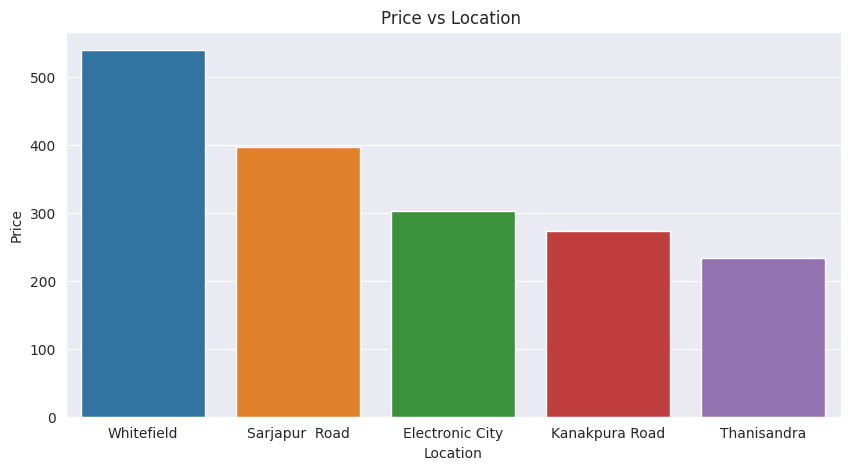

In [33]:
most_loc = df3[['location','price']].groupby('location').price.count().sort_values(ascending = False).head()
y_points = np.array(most_loc)
x_points = np.array(most_loc.index)

plt.figure(figsize=(10,5))

sns.barplot(x=x_points,y = y_points)
sns.set_style ('darkgrid')
plt.xlabel('Location')
plt.ylabel('Price')
plt.title('Price vs Location ')
plt.show


Creating a histogram of the 'price' column.

<function matplotlib.pyplot.show(close=None, block=None)>

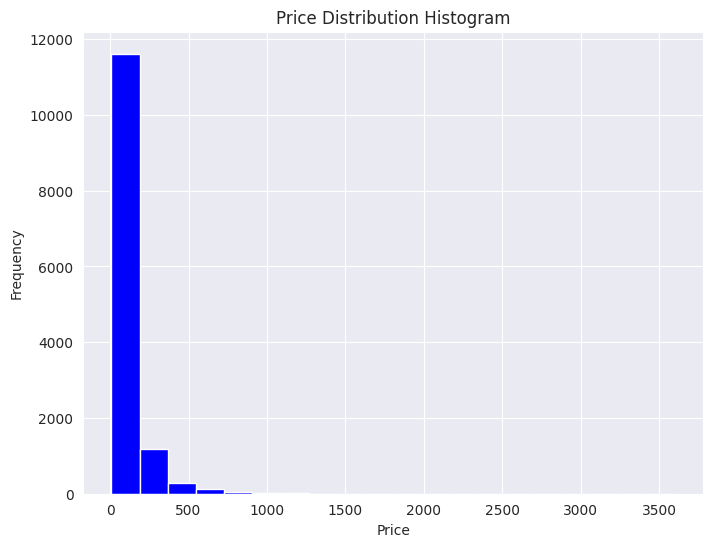

In [34]:
plt.figure(figsize=(8,6))
plt.hist(df3['price'],bins=20,color='blue')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution Histogram')
plt.show

Relationship between the number of bathrooms and property prices.

<function matplotlib.pyplot.show(close=None, block=None)>

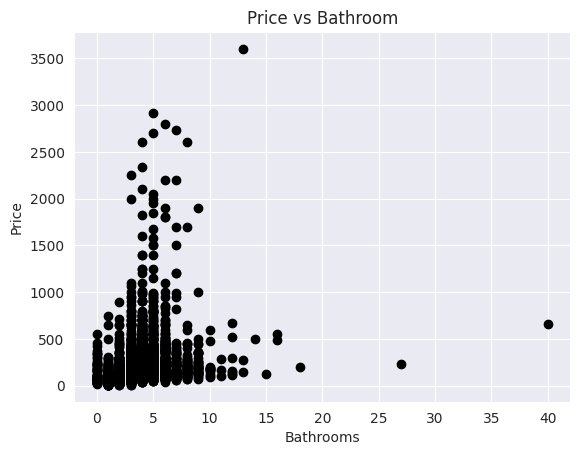

In [35]:
plt.scatter(df3['bath'],df2['price'],color='black')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.title('Price vs Bathroom')
plt.show

Counting the number of prices within each availability category,

<function matplotlib.pyplot.show(close=None, block=None)>

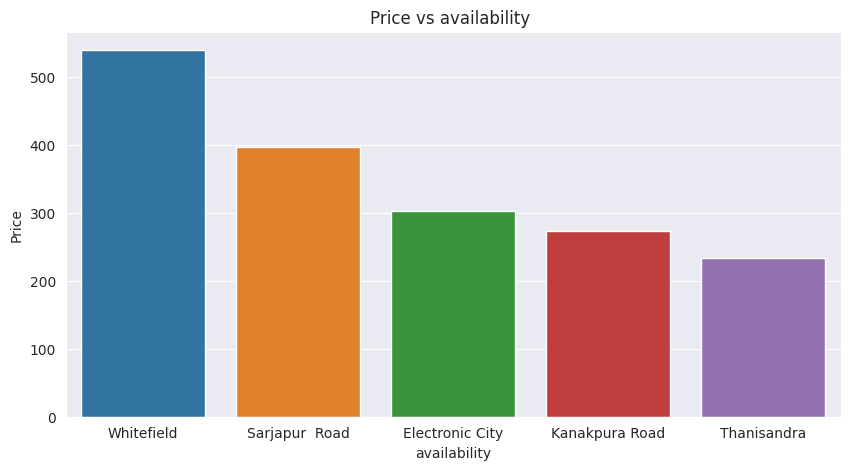

In [18]:
most_avail = df[['availability','price']].groupby('availability').price.count().sort_values(ascending = False).head()
y_points = np.array(most_loc)
x_points = np.array(most_loc.index)

plt.figure(figsize=(10,5))

sns.barplot(x=x_points,y = y_points)
sns.set_style ('darkgrid')
plt.xlabel('availability')
plt.ylabel('Price')
plt.title('Price vs availability ')
plt.show

The highest price for each availability category

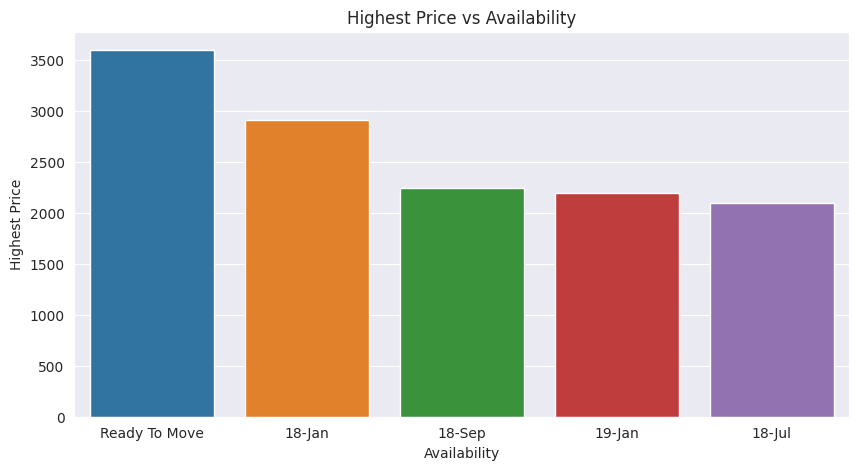

In [45]:
max_price_by_availability = df.groupby('availability')['price'].max().sort_values(ascending=False).head()
y_points = max_price_by_availability.values
x_points = max_price_by_availability.index

plt.figure(figsize=(10, 5))

sns.barplot(x=x_points, y=y_points)
sns.set_style('darkgrid')
plt.xlabel('Availability')
plt.ylabel('Highest Price')
plt.title('Highest Price vs Availability')
plt.show()

Scatter plot where each point represents a property's total square foot

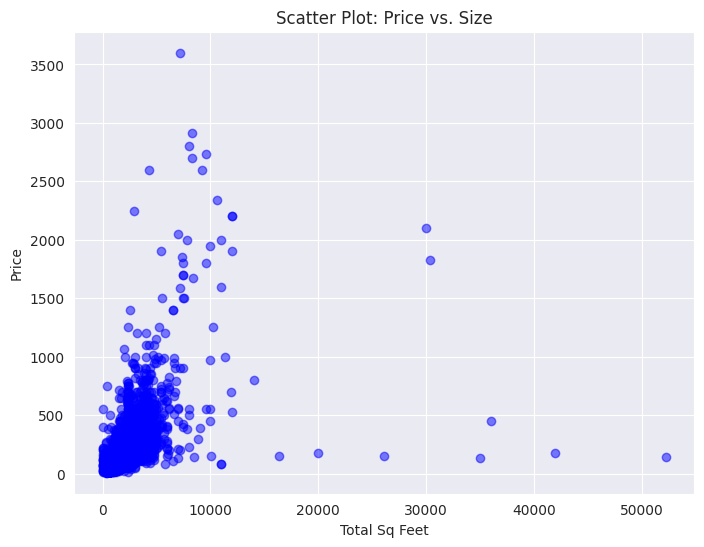

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(df3['total_sqft'], df3['price'], c='blue', marker='o', alpha=0.5)

plt.xlabel('Total Sq Feet')
plt.ylabel('Price')
plt.title('Scatter Plot: Price vs. Size')

plt.grid(True)
plt.show()

Counting the number of prices within each size category

<function matplotlib.pyplot.show(close=None, block=None)>

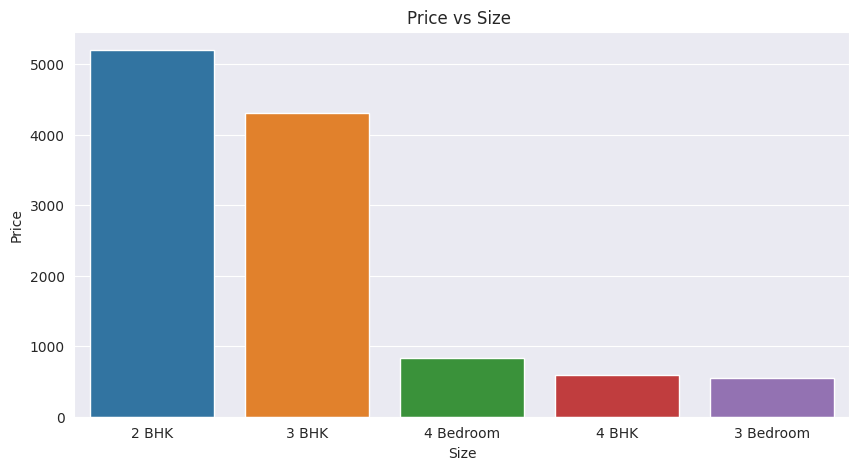

In [19]:
bhk = df[['size','price']].groupby('size').price.count().sort_values(ascending = False).head()
y_points = np.array(bhk)
x_points = np.array(bhk.index)

plt.figure(figsize=(10,5))

sns.barplot(x=x_points,y = y_points)
sns.set_style('darkgrid')
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Price vs Size ')
plt.show

The highest price for each size category

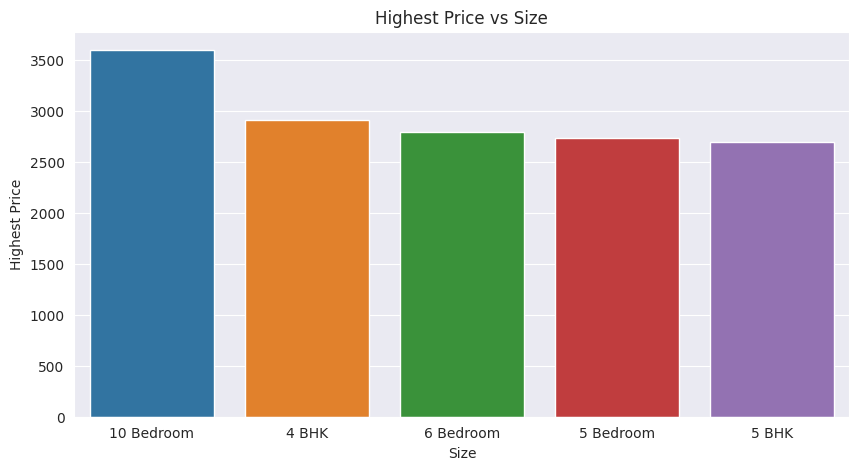

In [43]:
max_price_by_size = df.groupby('size')['price'].max().sort_values(ascending=False).head()
y_points = max_price_by_size.values
x_points = max_price_by_size.index

plt.figure(figsize=(10, 5))

sns.barplot(x=x_points, y=y_points)
sns.set_style('darkgrid')
plt.xlabel('Size')
plt.ylabel('Highest Price')
plt.title('Highest Price vs Size')
plt.show()

Box plot that displays the distribution of property prices for different area types.

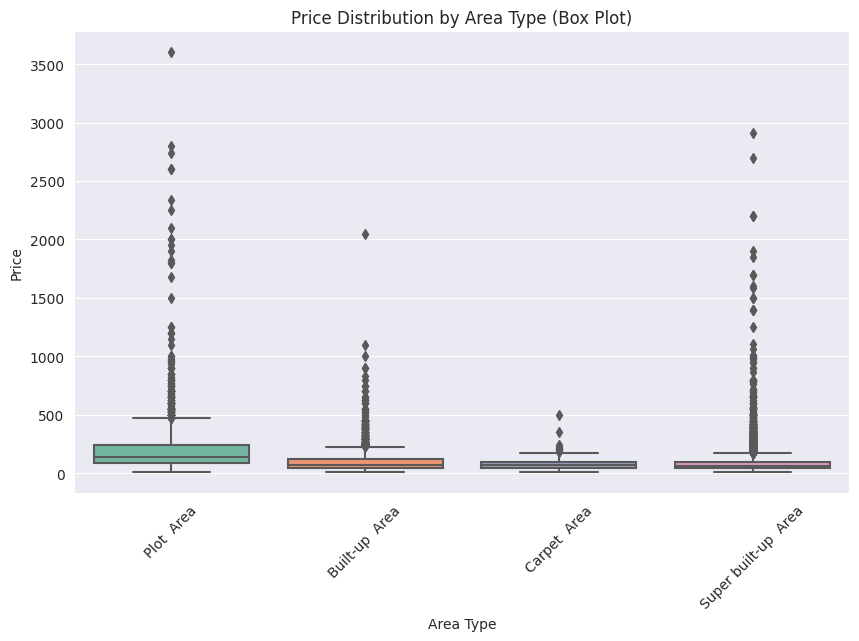

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='area_type', y='price', data=df3, palette='Set2')

plt.xlabel('Area Type')
plt.ylabel('Price')
plt.title('Price Distribution by Area Type (Box Plot)')

plt.xticks(rotation=45)
plt.show()